# Missing values - Feature Engineering

What are the different types of Missing Data?

Missing Completely at Random, MCAR: 
                A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.



In [2]:
# importing the libraries

import pandas as pd

In [3]:
#reading the dataset

df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# here the age and cabin having any relation? yes
## that person may be staying at cabin

In [9]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
# embarked is like from which station they have started or landed
## this embarked is missing at random

### next type

#### Missing data not at Random(MNAR): Systematic missing values
 there is absolutely relationship between the data missing and any other values, observed or missing, within the dataset.

In [11]:
# here cabin and age have some relationship

In [12]:
import numpy as np

In [15]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

In [17]:
## finding the percentage

df['cabin_null'].mean()

0.7710437710437711

In [19]:
df.groupby('Survived')['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### Next type 
### Missing At random (MAR)

men--hide their salary


woman-- hide their age

Teenager--smoking

## All the techniques of handling missing values
1. Mean, Median, Mode
2. Random sample Imputation
3. Capturing NAN values with a new Feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

# Numerical feature

## Mean /Median /Mode imputation ( mostly used )

when to apply?

Mean/Median imputation has the assumption that the data are missing completely at random(MCAR).
Solve this by replacing the NAN with the most frequent occurance of the variables

In [22]:
df=pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])

df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [24]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)

In [27]:
median=df.Age.median()
median

28.0

In [28]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [31]:
# comparing std of age and age_median

print(df.Age.std())
print(df.Age_median.std())

14.526497332334042
13.019696550973201


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

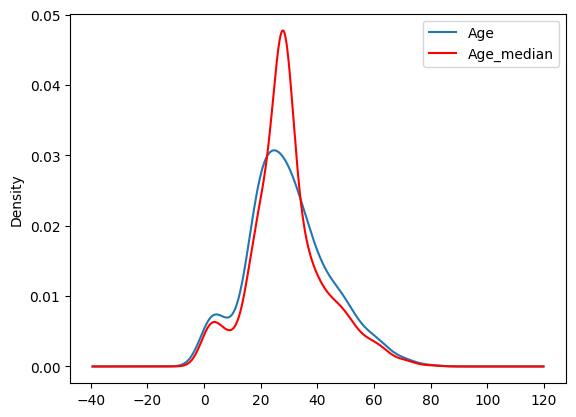

In [37]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages and Disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implement ( Robust to outliers )
2. Faster way to obtain the complete dataset

#### Disadvantages
1. Change or Distortion in the orginal variance
2. Impacts Correlation

### Randam Sample Imputation ( mostly used )

Aim: Random Sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used?

It assumes that the data are missing completely at random (MCAR)

In [42]:
import pandas as pd

df=pd.read_csv('Titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [43]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [49]:
# FOR PERCENTAGE

np.round(df.isnull().mean(),4)

Survived    0.0000
Age         0.1987
Fare        0.0000
dtype: float64

In [69]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [65]:
# to create random sample with condition

df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [76]:
def inpute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    
    ## it will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    ## pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [77]:
median=df.Age.median()
median

28.0

In [78]:
inpute_nan(df,'Age',median)

In [79]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


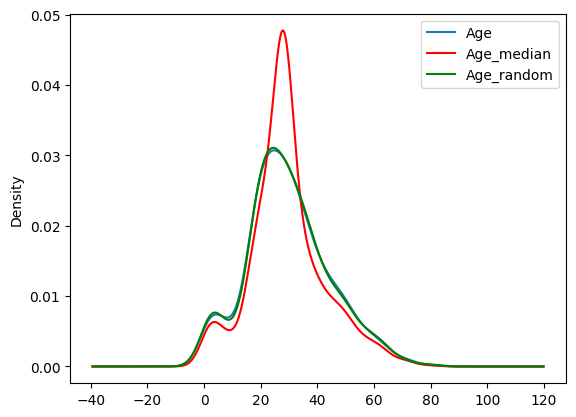

In [80]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde', ax=ax, color='red')
df['Age_random'].plot(kind='kde', ax=ax, color='Green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [82]:
# Standart deviation

print(df.Age.std())
print(df.Age_median.std())
print(df.Age_random.std())

14.526497332334042
13.019696550973201
14.56365408956869


#### Advantages
1. Easy to implement
2. there is no distortion in variance

#### Disadvantages
1. In every situtaion randomness wont work

which is good? mean/median imputation or random sample imputation

## Capturing NAN values with a new Feature or variable

It works well when if the data are not missing completely at random - MNAR

In [84]:
df=pd.read_csv('Titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [85]:
df['Age_nan']=np.where(df['Age'].isnull(),1,0)

In [86]:
df.head()

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [90]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [91]:
df.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values

#### Disadvantage
1. Creating Additional Features( curse of dimensionality )

## End of Distribution imputation

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

Replacing the nan values with the far end of the distribution

In [92]:
df=pd.read_csv('Titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

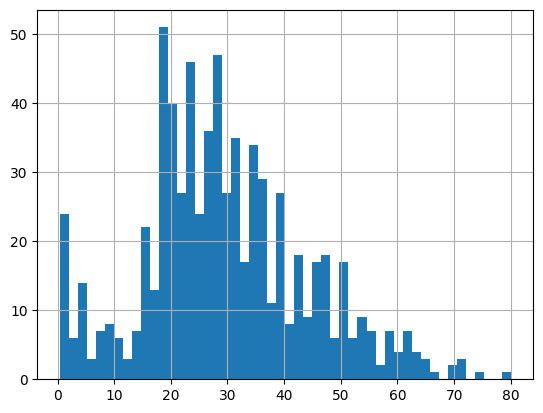

In [93]:
 df.Age.hist(bins=50)

C:\Users\BRAGADEESH\anaconda3\envs\featurengineering\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

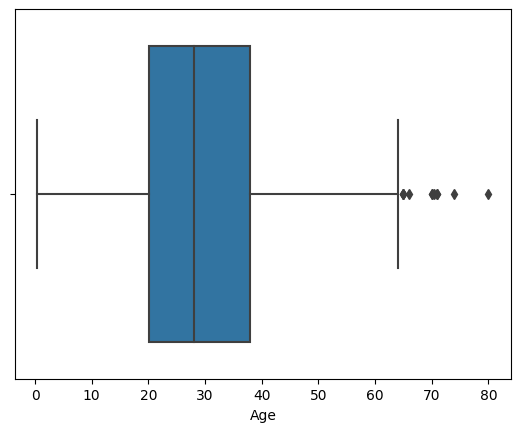

In [99]:
import seaborn as sns

sns.boxplot(df.Age)

In [100]:
# Taking values from the after 3rd std

extreme=df.Age.mean()+3*df.Age.std()

In [103]:
def inpute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [104]:
inpute_nan(df,'Age',df.Age.median(),extreme)

In [106]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

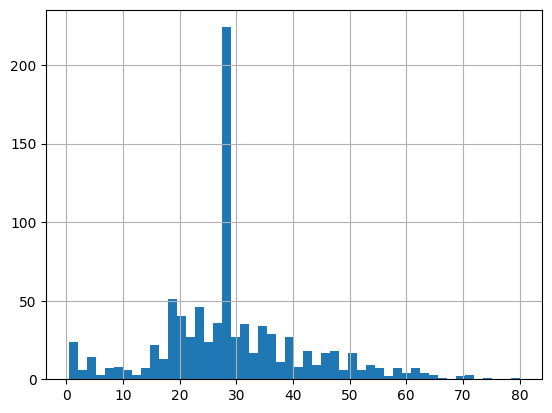

In [108]:
 df.Age.hist(bins=50)

<AxesSubplot:>

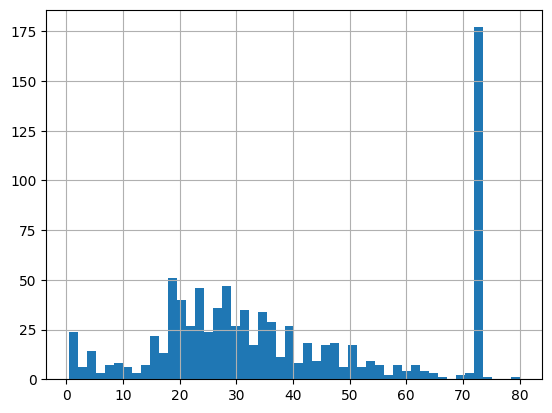

In [109]:
 df.Age_end_distribution.hist(bins=50)

C:\Users\BRAGADEESH\anaconda3\envs\featurengineering\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

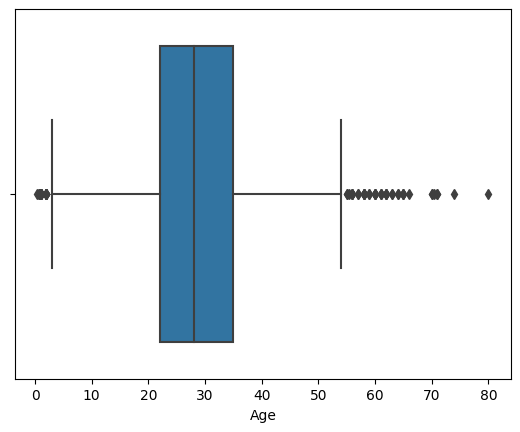

In [107]:
sns.boxplot(df.Age)

C:\Users\BRAGADEESH\anaconda3\envs\featurengineering\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

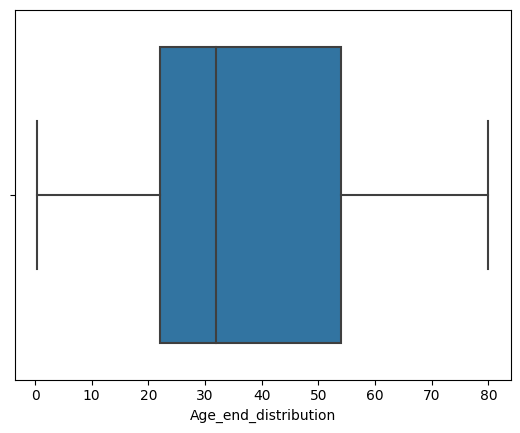

In [110]:
sns.boxplot(df.Age_end_distribution)

#### Advantages
1. Easy to implement
2. Captures the importance of missingness if there is one

#### Disadvantages
1. Distorts the original distribution of the variable
2. if missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
3. if the number of NA is big, it will mask true outliers in the distribution
4. If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent feature engineering

## Arbitrary imputation

This technique wad derived from kaggle competition


it consists of replacing nan by an arbitrary value

In [117]:
## Arbitrary values
# it should be frequently present

In [118]:
df=pd.read_csv('Titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [119]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    

In [120]:
impute_nan(df,'Age')

In [122]:
df.head(10)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


#### Advantages
1. Easy to implement
2. Captures the importance of missingness if there is one

#### Disadvantage
1. distorts the orginal distribution of the variable
2. if missingness is not important, it may mask the predictive power of the orginal variable by distorting its distribution
3. Hard to decide which value to use

# Categorical features

### Frequent Category imputation

In [126]:
df=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [127]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [130]:
df.shape

(1460, 4)

In [133]:
# percentage of missing values

df.isnull().mean().sort_values(ascending=False)

FireplaceQu    0.472603
GarageType     0.055479
BsmtQual       0.025342
SalePrice      0.000000
dtype: float64

In [129]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

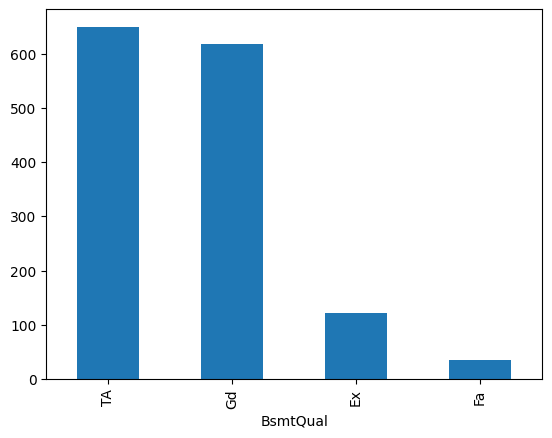

In [147]:
### compute the frequency with every feature

df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [156]:
## replacing the nan values with TA

frequent=df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(frequent,inplace=True)

#### Advantages
1. Easy to implement
2. Faster way to implement

#### Disadvantage
1. Since we are using the more frequent labels, it may use them in an over represented way, if they are many nan
2. it distorts the relation of the most frequent label

### Adding a variable to capture NAN

use it if my feature have more nan values

In [151]:
df=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [152]:
# creating another feature indication this feature has nan or not

df['BsmtQual_nan']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [153]:
frequent=df['BsmtQual'].mode()[0]

In [154]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [155]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


## Creating new category
#### suppose if you have more frequent categories, we just replace NAN with a new category

Most frequently used


In [157]:
df=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [158]:
def impute_nan(df,variable):
    df[variable+'_newvar']=np.where(df[variable].isnull(),'missing',df[variable])

In [159]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df,feature)

In [160]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [161]:
df.drop(['BsmtQual', 'FireplaceQu', 'GarageType'],axis=1)

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,missing,Attchd


In [ ]:
#### i.e df[feature].fillna('missing')